<a href="https://colab.research.google.com/github/7nos/7nos/blob/master/DL_Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Expt 5: Develop a convolutional neural network on the Fashion-MNIST dataset.**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

print("Demo by G. Solomon Matthews")

Demo by G. Solomon Matthews


In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


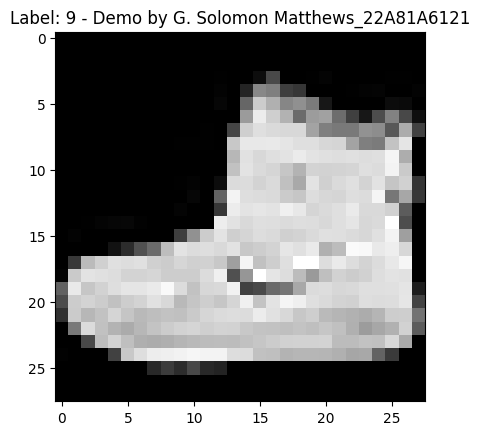

In [ ]:
plt.imshow(X_train[0], cmap='gray')
plt.title("Label: " + str(y_train[0]) + " - Demo by G. Solomon Matthews_22A81A6121")
plt.show()

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.7004 - loss: 0.8144 - val_accuracy: 0.8563 - val_loss: 0.3959
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 34ms/step - accuracy: 0.8467 - loss: 0.4257 - val_accuracy: 0.8724 - val_loss: 0.3425
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.8684 - loss: 0.3635 - val_accuracy: 0.8896 - val_loss: 0.2940
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.8820 - loss: 0.3264 - val_accuracy: 0.8878 - val_loss: 0.2898
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.8890 - loss: 0.3043 - val_accuracy: 0.8974 - val_loss: 0.2755
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 51s 34ms/step - accuracy: 0.8973 - loss: 0.2799 - val_accuracy: 0.9029 - val_loss: 0.2635
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 78s 32ms/step - accuracy: 0.9035 - loss: 0.2584 - val_accuracy: 0.8979 - val_loss: 0.2757
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9093 -

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9013 - loss: 0.2971

Test Loss: 0.2820235788822174
Test Accuracy: 0.9013000130653381


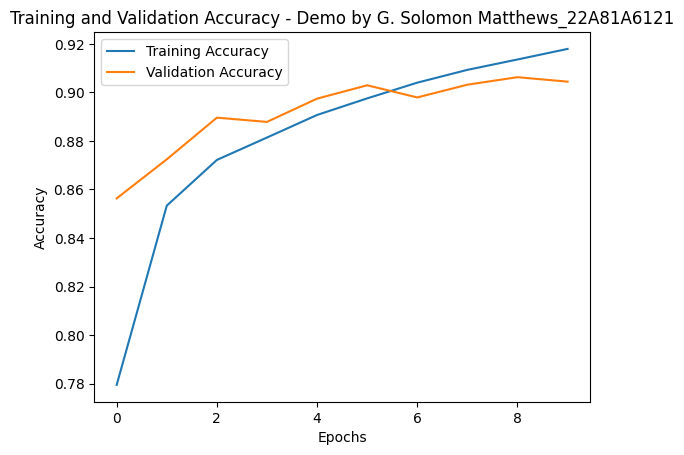

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training and Validation Accuracy - Demo by G. Solomon Matthews_22A81A6121")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

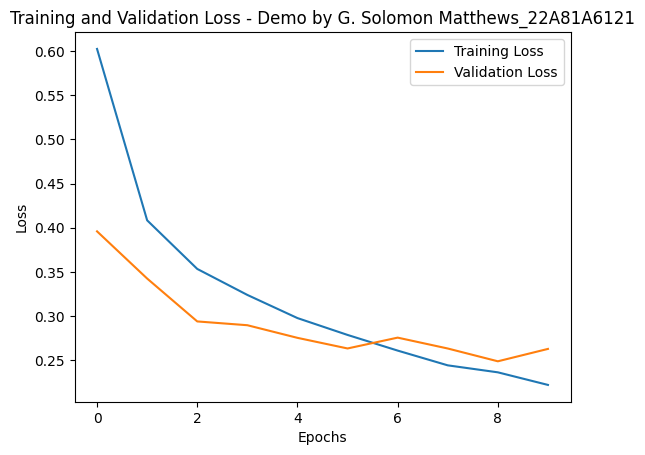

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss - Demo by G. Solomon Matthews_22A81A6121")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


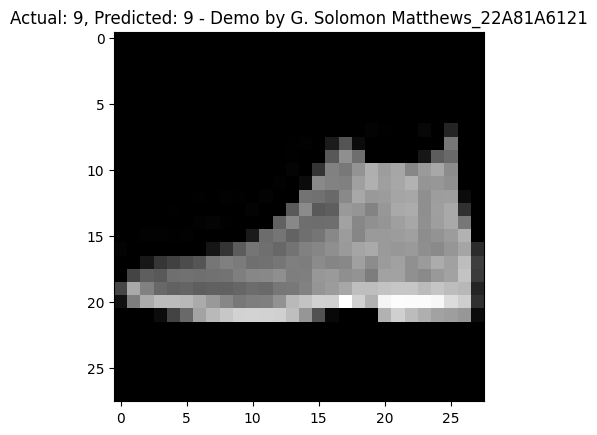

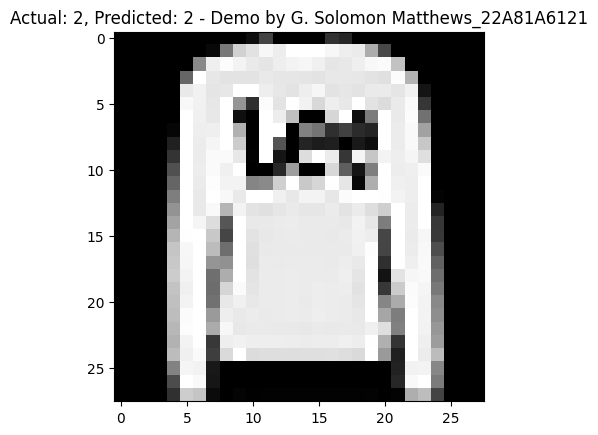

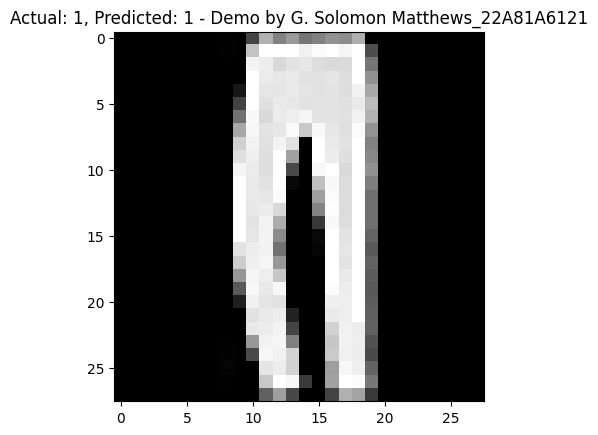

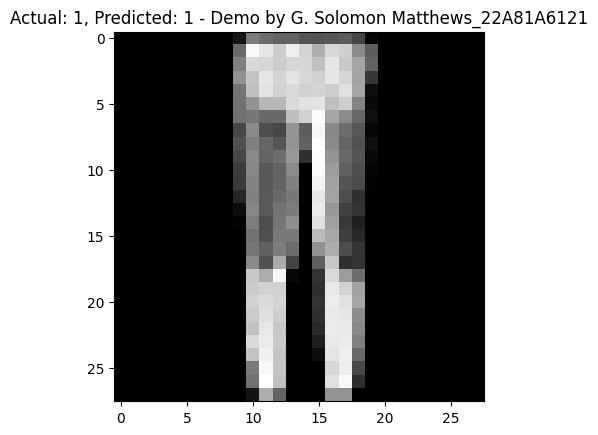

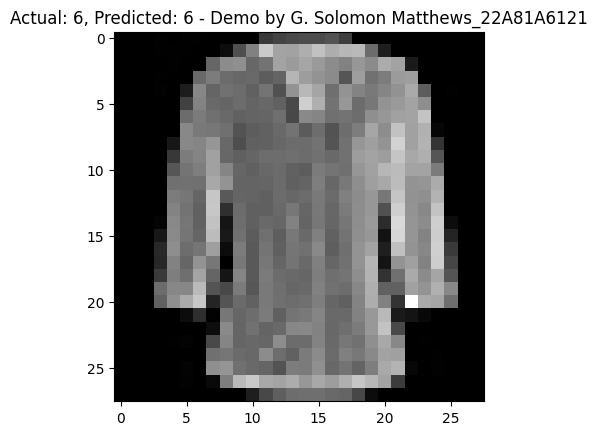

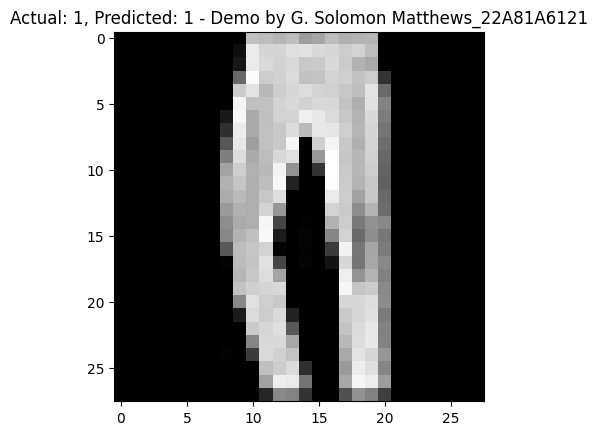

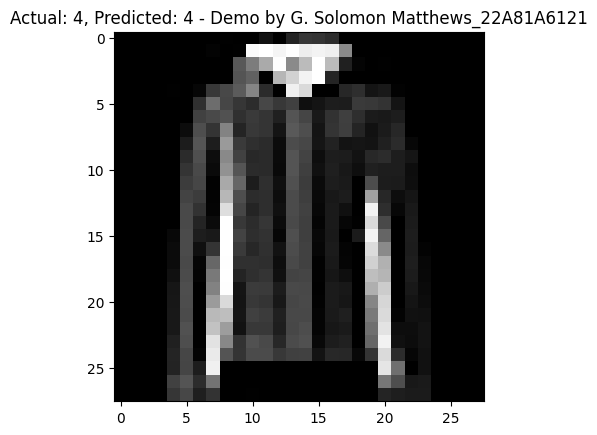

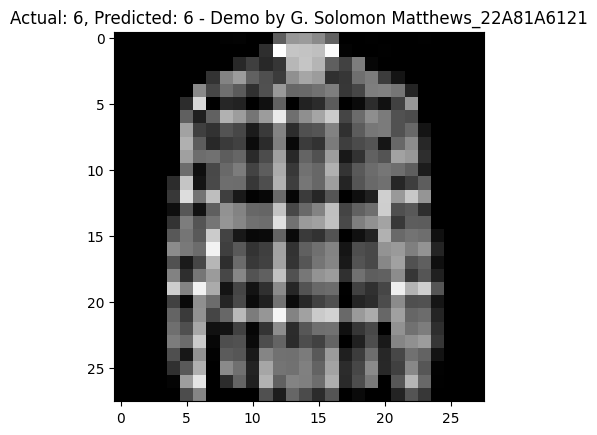

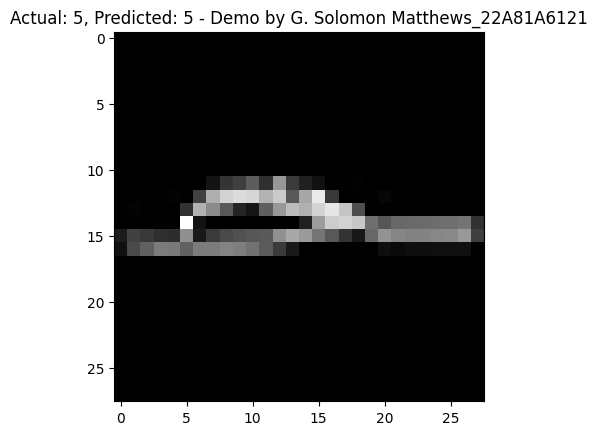

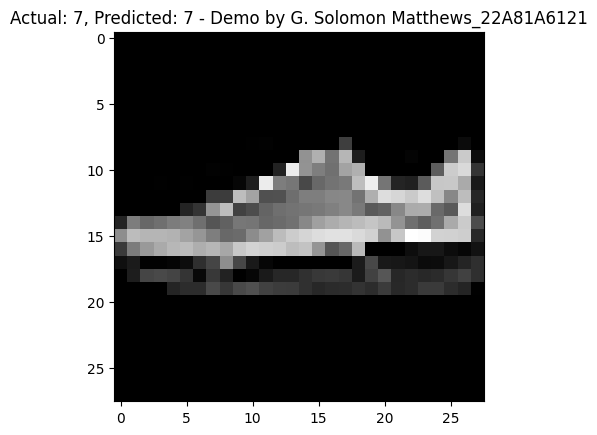

In [ ]:
y_pred = model.predict(X_test[:10])

for i in range(10):
    actual_label = y_test[i]
    predicted_label = tf.argmax(y_pred[i]).numpy()

    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {actual_label}, Predicted: {predicted_label} - Demo by G. Solomon Matthews_22A81A6121")
    plt.show()